In [1]:
import numpy as np

from CSR import *
import matplotlib.pyplot as plt
from matplotlib import cm
import h5py
from tools import plot_surface

## Run DFCSR

In [2]:
testCSR = CSR2D(input_file= 'input/dipole_config.yaml')

start reinterpolation. number of slice 1
Re-interpolation finished!


In [3]:
testCSR.run()

Calculating CSR at s= 0.1
--- 12.589817523956299 seconds ---
Beams written to  G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\output\chirp-2023-05-02T09_38_31-07_00-particles.h5
Wakes written to  G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\output/chirp-2023-05-02T09_38_31-07_00-wakes.h5
Calculating CSR at s= 0.2
--- 12.661937713623047 seconds ---
Beams written to  G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\output\chirp-2023-05-02T09_38_31-07_00-particles.h5
Wakes written to  G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\output/chirp-2023-05-02T09_38_31-07_00-wakes.h5
Calculating CSR at s= 0.30000000000000004
--- 12.446751594543457 seconds ---
Beams written to  G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\output\chirp-2023-05-02T09_38_31-07_00-particles.h5
Wakes written to  G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\output/chirp-2023-05-02T09_38_31-07_00-wakes.h5
Calculating CSR at s= 0.4
--- 12.807202577590942 se

G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\CSR.py:490: RuntimeWarning: invalid value encountered in divide
  CSR_integrand_z = CSR_numerator1/CSR_denominator + (CSR_numerator2 + CSR_numerator3)/CSR_denominator
G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\CSR.py:505: RuntimeWarning: invalid value encountered in divide
  W1 = scale_term * part1 / (r_minus_rp * r_minus_rp * r_minus_rp) * density_ret
G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\CSR.py:506: RuntimeWarning: invalid value encountered in divide
  W2 = scale_term * part1 / (r_minus_rp * r_minus_rp) * partial_density
G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\CSR.py:507: RuntimeWarning: invalid value encountered in divide
  W3 = -scale_term * part2 / r_minus_rp * partial_density


--- 12.689072847366333 seconds ---
Beams written to  G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\output\chirp-2023-05-02T09_38_31-07_00-particles.h5
Wakes written to  G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\output/chirp-2023-05-02T09_38_31-07_00-wakes.h5
frac 28.21004938135094
start reinterpolation. number of slice 14
Re-interpolation finished!
Calculating CSR at s= 1.3
--- 14.175168514251709 seconds ---
Beams written to  G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\output\chirp-2023-05-02T09_38_31-07_00-particles.h5
Wakes written to  G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\output/chirp-2023-05-02T09_38_31-07_00-wakes.h5
frac 28.19266691484263
Calculating CSR at s= 1.4000000000000001
--- 13.22261667251587 seconds ---
Beams written to  G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\output\chirp-2023-05-02T09_38_31-07_00-particles.h5
Wakes written to  G:\My Drive\Stanford\research\FEL\CSR\pyDFCSR\pyDFCSR_2D\output/chirp

C:\Users\yingb\miniconda3\envs\pyDFCSR\lib\site-packages\numpy\linalg\linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


## Plot output

Keys: <KeysViewHDF5 ['step_1', 'step_2', 'step_3', 'step_4', 'step_5', 'step_6', 'step_7', 'step_8', 'step_9']>
attr keys <KeysViewHDF5 []>
Keys: <KeysViewHDF5 ['x_grids', 'xkicks', 'z_grids']>
(20, 20)


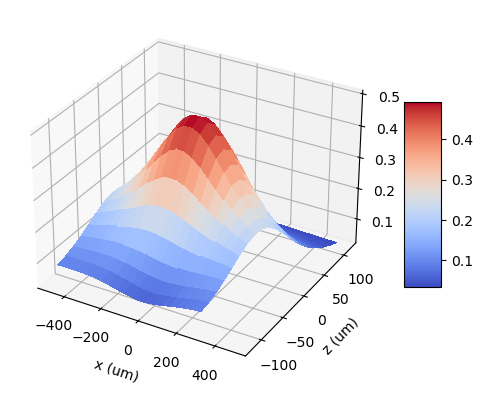

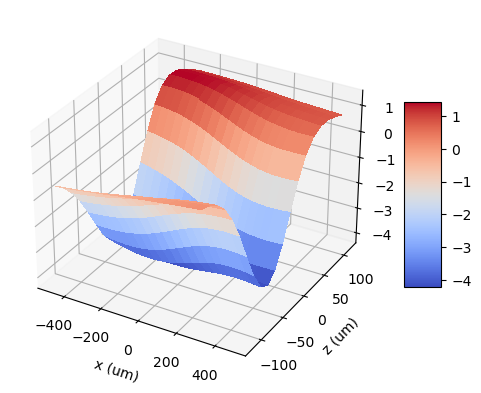

In [2]:
filename = "./output/test_apply-2023-05-02T16_22_05-07_00-wakes.h5"

with h5py.File(filename, "r") as f:
     step = 'step_7'
     print("Keys: %s" % f.keys())
     print('attr keys', f.attrs.keys())
     dE_dct = np.array(f[step]['longitudinal']['dE_dct'])
     x_grids = np.array(f[step]['longitudinal']['x_grids']).reshape(dE_dct.shape)
     z_grids = np.array(f[step]['longitudinal']['z_grids']).reshape(dE_dct.shape)

     print("Keys: %s" % f[step]['transverse'].keys())
     xkicks = np.array(f[step]['transverse']['xkicks'])


     print(z_grids.shape)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x_grids*1e6, z_grids*1e6, xkicks, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('x (um)')
ax.set_ylabel('z (um)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x_grids*1e6, z_grids*1e6, dE_dct, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('x (um)')
ax.set_ylabel('z (um)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [6]:
filename = "output/test_apply-2023-05-02T16_22_05-07_00-particles.h5"

with h5py.File(filename, "r") as f:
     step = 'step_7'
     print("Keys: %s" % f[step]['particles'].keys())
     x = np.array(f[step]['particles']['x'])
     y = np.array(f[step]['particles']['y'])
     xp = np.array(f[step]['particles']['xp'])
     yp = np.array(f[step]['particles']['yp'])
     z = np.array(f[step]['particles']['z'])
     delta = np.array(f[step]['particles']['delta'])

Keys: <KeysViewHDF5 ['delta', 'x', 'xp', 'y', 'yp', 'z']>


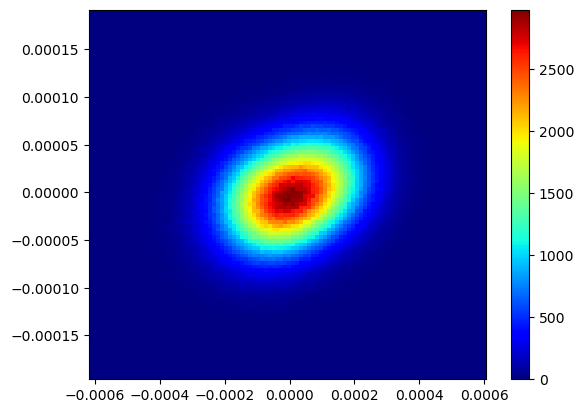

In [7]:
h,xedges,yedges,_ = plt.hist2d(x,z, bins = 100, cmap=plt.cm.jet)
plt.colorbar()

Keys: <KeysViewHDF5 ['Cx', 'Cxp', 'R51', 'R52', 'R56', 'alphaX', 'alphaX_beam', 'alphaX_minus_dispersion', 'betaX', 'betaX_beam', 'betaX_minus_dispersion', 'coords', 'etaX', 'etaXp', 'gemitX', 'gemitX_minus_dispersion', 'n_vec', 'sigE', 'sigX', 'sigZ', 'slope', 'step_positions', 'tau_vec']>


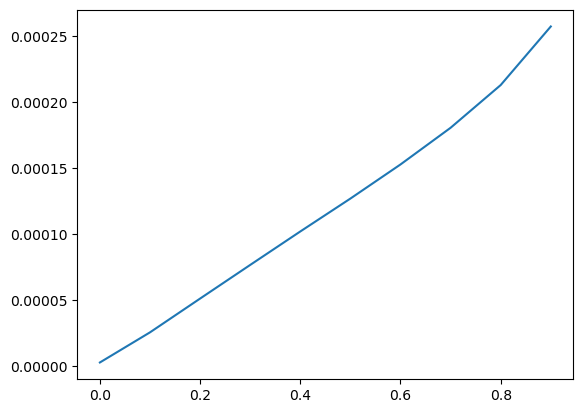

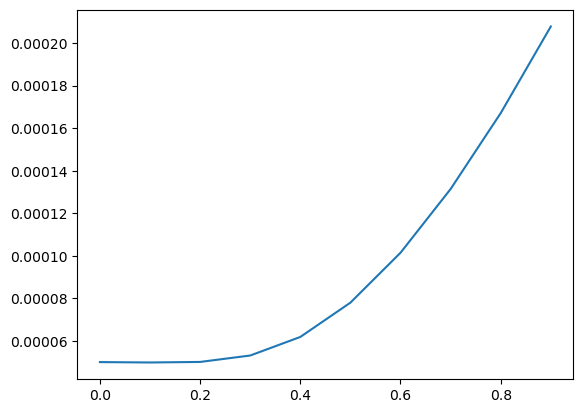

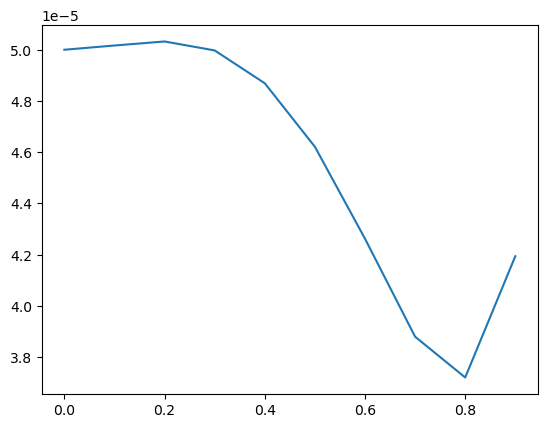

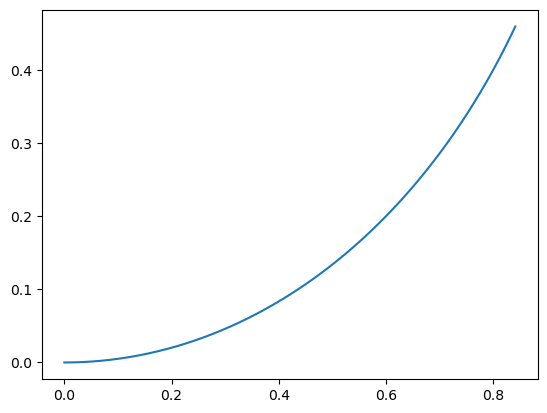

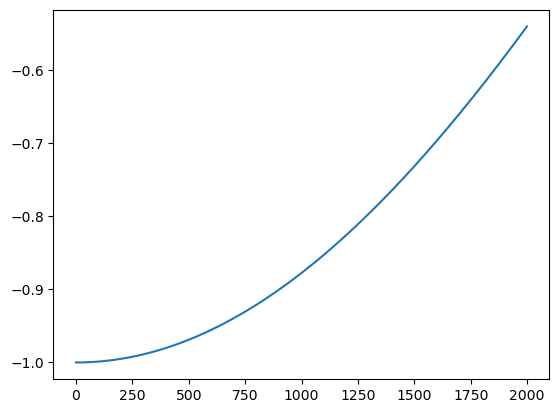

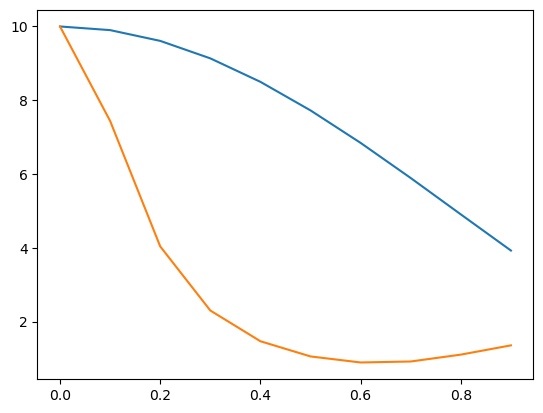

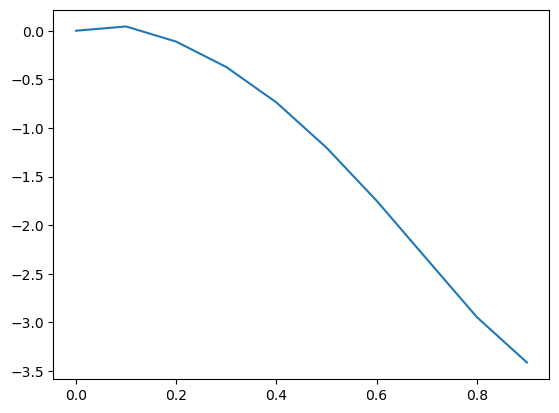

In [10]:
import h5py
from tools import full_path
filename = full_path("./output/test_apply-2023-05-02T16_22_05-07_00-statistics.h5")

with h5py.File(filename, "r") as f:
    print("Keys: %s" % f.keys())
    s = np.array(f['step_positions'])
    sigma_x = np.array(f['sigX'])
    sigma_z = np.array(f['sigZ'])
    coords = np.array(f['coords'])
    n_vec = np.array(f['n_vec'])
    tau_vec = np.array(f['tau_vec'])
    alphaX = np.array(f['alphaX'])
    betaX  = np.array(f['betaX'])
    betaX_minus_dispersion = np.array(f['betaX_minus_dispersion'])
    alphaX_beam = np.array(f['alphaX_beam'])
    gemitX = np.array(f['gemitX'])


plt.plot(s, gemitX)
plt.show()
plt.plot(s, sigma_x)
plt.show()
plt.plot(s, sigma_z)
plt.show()
plt.plot(coords[:,0], coords[:, 1])
plt.show()
plt.plot(n_vec[:,1])
plt.show()
plt.plot(s, betaX)
plt.plot(s, betaX_minus_dispersion)

plt.show()

plt.plot(s, alphaX_beam)
plt.show()

In [6]:
print(s)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95]
